In [7]:
%run EDA.ipynb

In [3]:
# Shot chart test data

kobe_clutch_data = shot_df.loc[(shot_df["PLAYER_NAME"] == "Kobe Bryant")
                               & (shot_df["QUARTER"] >= 4)
                               & (shot_df["MINS_LEFT"] == 0)
                               & (shot_df["SECS_LEFT"] <= 5)]

kobe_clutch_data

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
1569786,2016,2015-16,1610612747,Los Angeles Lakers,977,Kobe Bryant,F,SF,2016-01-08,21500549,LAL,OKC,Missed Shot,False,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center,C,Less Than 8 ft.,-7.4,6.55,7,4,0,3
1772177,2015,2014-15,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,2015-01-13,21400573,LAL,MIA,Missed Shot,False,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center,LC,24+ ft.,12.3,27.15,25,4,0,1
1785407,2015,2014-15,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,2015-01-02,21400494,LAL,MEM,Missed Shot,False,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center,LC,24+ ft.,13.3,27.45,25,4,0,0
1802698,2015,2014-15,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,2014-12-19,21400392,LAL,OKC,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center,LC,16-24 ft.,11.7,17.05,16,4,0,2
1811664,2015,2014-15,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,2014-12-12,21400339,SAS,LAL,Missed Shot,False,Fadeaway Jump Shot,2PT Field Goal,Mid-Range,Left Side,L,8-16 ft.,13.4,5.25,13,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858342,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,2004-03-15,20300966,LAL,ORL,Missed Shot,False,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,22.8,7.85,22,4,0,2
3879262,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,2004-02-26,20300836,LAL,SAC,Missed Shot,False,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center,RC,24+ ft.,-16.4,25.45,26,4,0,2
3938480,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,2004-01-02,20300462,SEA,LAL,Missed Shot,False,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center,RC,24+ ft.,-20.7,20.25,25,4,0,0
3953185,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,2003-12-19,20300369,LAL,DEN,Made Shot,True,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,-1.0,25.85,20,4,0,0


In [4]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

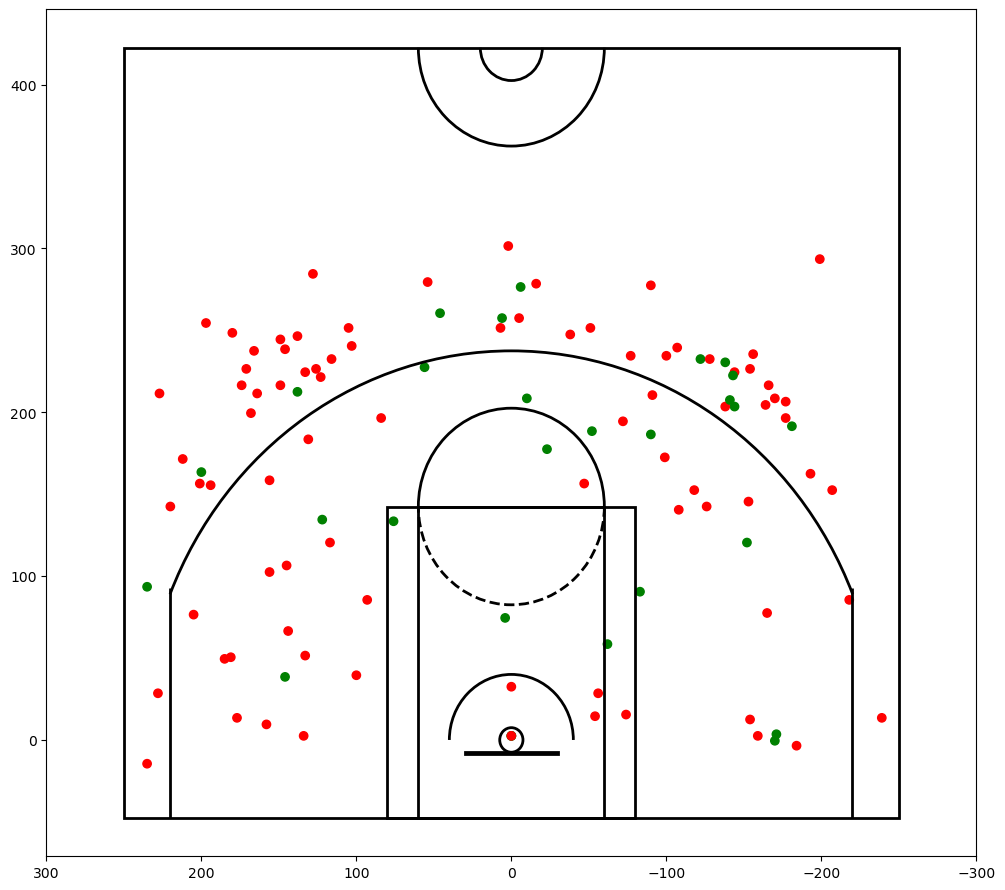

In [9]:
plt.figure(figsize=(12,11))

col = np.where(kobe_clutch_data["SHOT_MADE"], 'g', 'r')

plt.scatter(kobe_clutch_data.LOC_X * 10, (kobe_clutch_data.LOC_Y-5)*10, c=col)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

In [6]:
shot_df[(shot_df["LOC_X"] == 0)
        & (shot_df["LOC_Y"] < 29)
        & (shot_df["LOC_Y"] > 28.75)]

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
36622,2023,2022-23,1610612758,Sacramento Kings,1628368,De'Aaron Fox,G,PG,2023-04-05,22201195,DAL,SAC,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,-0.0,28.95,23,4,0,3
1574287,2016,2015-16,1610612744,Golden State Warriors,202691,Klay Thompson,G,SG,2016-01-05,21500524,LAL,GSW,Missed Shot,False,Jump Shot,3PT Field Goal,Mid-Range,Center,C,16-24 ft.,-0.0,28.95,23,3,10,0
2474862,2011,2010-11,1610612746,Los Angeles Clippers,202329,Al-Farouq Aminu,F,SF,2011-03-12,21000978,WAS,LAC,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,-0.0,28.85,23,4,9,47
2550747,2011,2010-11,1610612739,Cleveland Cavaliers,2590,Mo Williams,G,PG,2011-01-05,21000512,CLE,TOR,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,-0.0,28.85,23,3,7,26
2918927,2009,2008-09,1610612743,Denver Nuggets,2546,Carmelo Anthony,F,SF,2009-02-03,20800719,DEN,SAS,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,-0.0,28.85,23,2,0,17
3783586,2005,2004-05,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,2004-12-05,20400247,POR,PHX,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,-0.0,28.95,23,2,5,8
3844612,2004,2003-04,1610612762,Utah Jazz,2306,Carlos Arroyo,G,PG,2004-03-27,20301053,UTA,DEN,Made Shot,True,Jump Shot,3PT Field Goal,Mid-Range,Center,C,16-24 ft.,-0.0,28.95,23,3,8,47
